# Recurrent Neural Network
##### Part 1 - Data Cleaning and Re-organizing
In this section we clean and organize the Google stock data.
##### Part 2 - Building the RNN structure
Now we build the actechure needed for a Recurrent Neural Network (RNN) with Theano with a few lines of code.
##### Part 3 - Training the RNN
Input the data to train the data. Train the data with 200 epochs.
##### Part 4 - Validate the model
Let's check if the model did well at all with retro stock data.
##### Part 5 - Visualize the results
Check the actual data of the GOOGLE stock vs what the model predicted.
##### Part 6 -  Predict new stock from 2012-2016
Here I predict the new stock from the testing data and see how the model can compare to unseen data.
##### Part 7 -  Evaluating the Error in the model
This outputs the Mean Squared Error. Which is suprisingly low. Good job me!

In [1]:
# Import the Depedencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler  # Pre-Process the data by Scaling. 
from sklearn.metrics import mean_squared_error  

from keras.models import Sequential  # We will build a Sequential Predic
from keras.layers import Dense, LSTM

import math

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # Make it look nice

plt.rcParams['figure.figsize'] = (12, 8) # I want viewer to see the great image quality.

Using TensorFlow backend.


## Part 1 - Data Cleaning and Re-organizing

In [2]:
# Import the Data Set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:, 1:2].values

# Feature Scaling
scaling = MinMaxScaler()
training_set = scaling.fit_transform(training_set)

# Load Training Data
X_train = training_set[0:1257]
y_train = training_set[1:1258]

# Reshaping to be a time - series value
X_train = np.reshape(X_train, newshape=(1257, 1, 1))

## Part 2 - Intialize the RNN

In [3]:
# create the RNN
rnn_regressor_model = Sequential()

# Very common to use 4 units of memory for LSTM
rnn_regressor_model.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

# The output layer
rnn_regressor_model.add(Dense(units=1))

# Compile the RNN
rnn_regressor_model.compile(optimizer='adam', loss='mean_squared_error')

## Part 3 -Training the RNN

In [5]:
rnn_regressor_model.fit(x=X_train, y=y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 2.5334e-04     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 2.5740e-04     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 2.5447e-04     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 2.5355e-04     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 2.5437e-04     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 2.5452e-04     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 2.5198e-04     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 2.5475e-04     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 2.5153e-04     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 2.5396e-04     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 2.5794e-04     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 2.541

1257/1257 [==============================] - 0s - loss: 2.5147e-04     
Epoch 98/200
1257/1257 [==============================] - 0s - loss: 2.5533e-04     
Epoch 99/200
1257/1257 [==============================] - 0s - loss: 2.5257e-04     
Epoch 100/200
1257/1257 [==============================] - 0s - loss: 2.5513e-04     
Epoch 101/200
1257/1257 [==============================] - 0s - loss: 2.5663e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.5386e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.5165e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.4958e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.5231e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.4901e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.5099e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 

1257/1257 [==============================] - 0s - loss: 2.4904e-04     
Epoch 193/200
1257/1257 [==============================] - 0s - loss: 2.5457e-04     
Epoch 194/200
1257/1257 [==============================] - 0s - loss: 2.4790e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.4874e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.5142e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.4944e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4836e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.5143e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4865e-04     


## Part 4 - Validate the model

In [6]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values

# Stock price of 2017
inputs = real_stock_price
inputs = scaling.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock = rnn_regressor_model.predict(inputs)

predicted_stock = scaling.inverse_transform(predicted_stock)

## Part 5 - Visualize the results

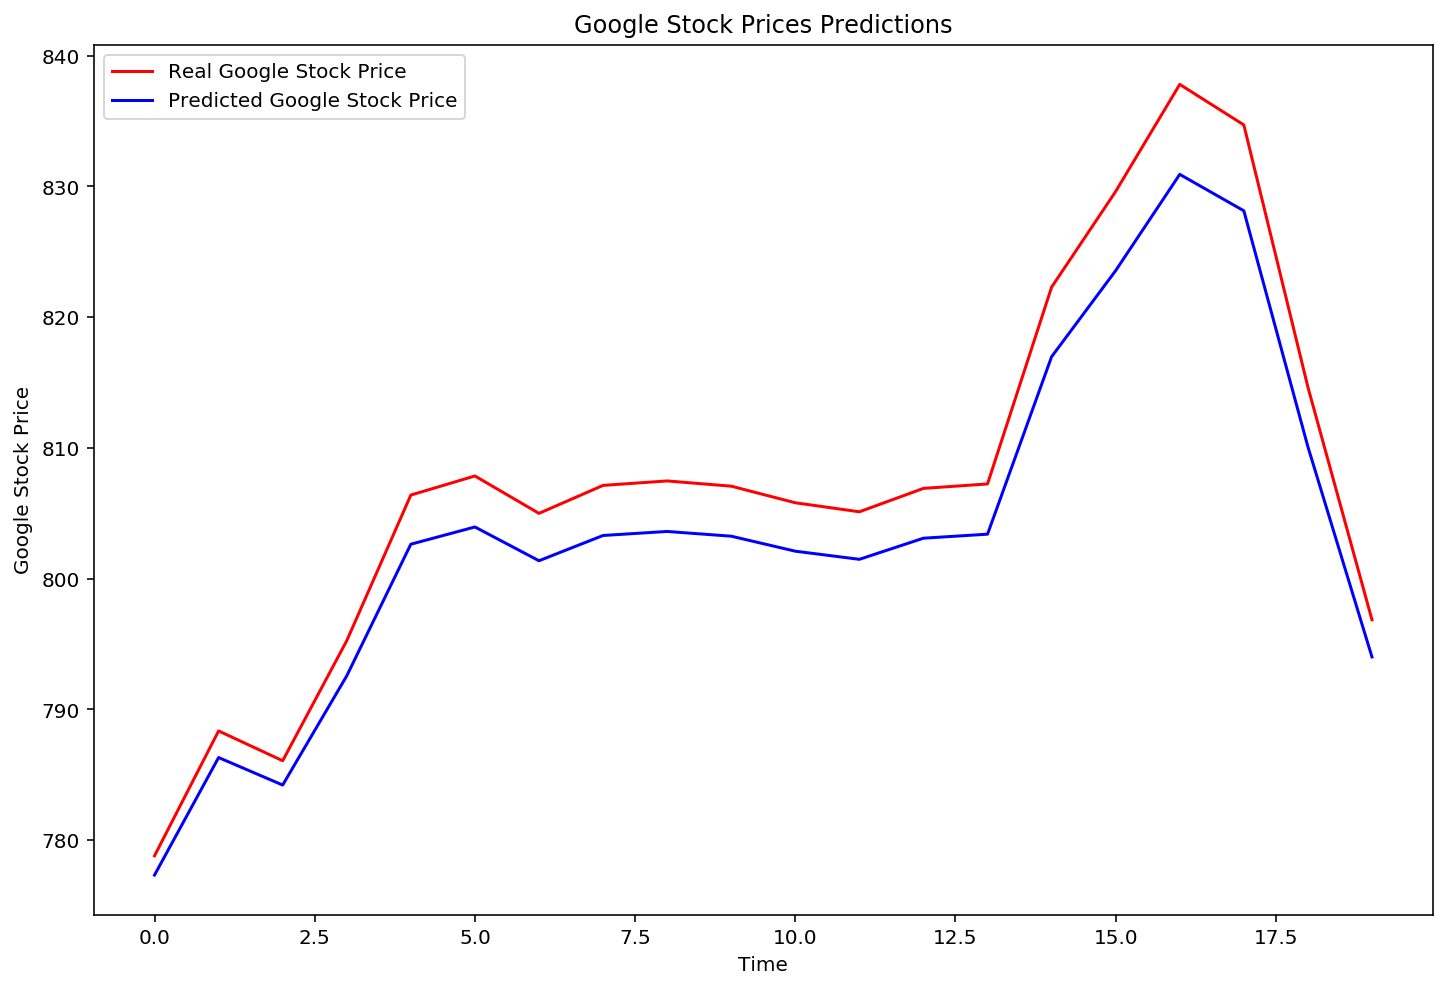

In [7]:
#Visualize the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Prices Predictions')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:, 1:2].values

## Part 6 - Predict new stock from 2012-2016

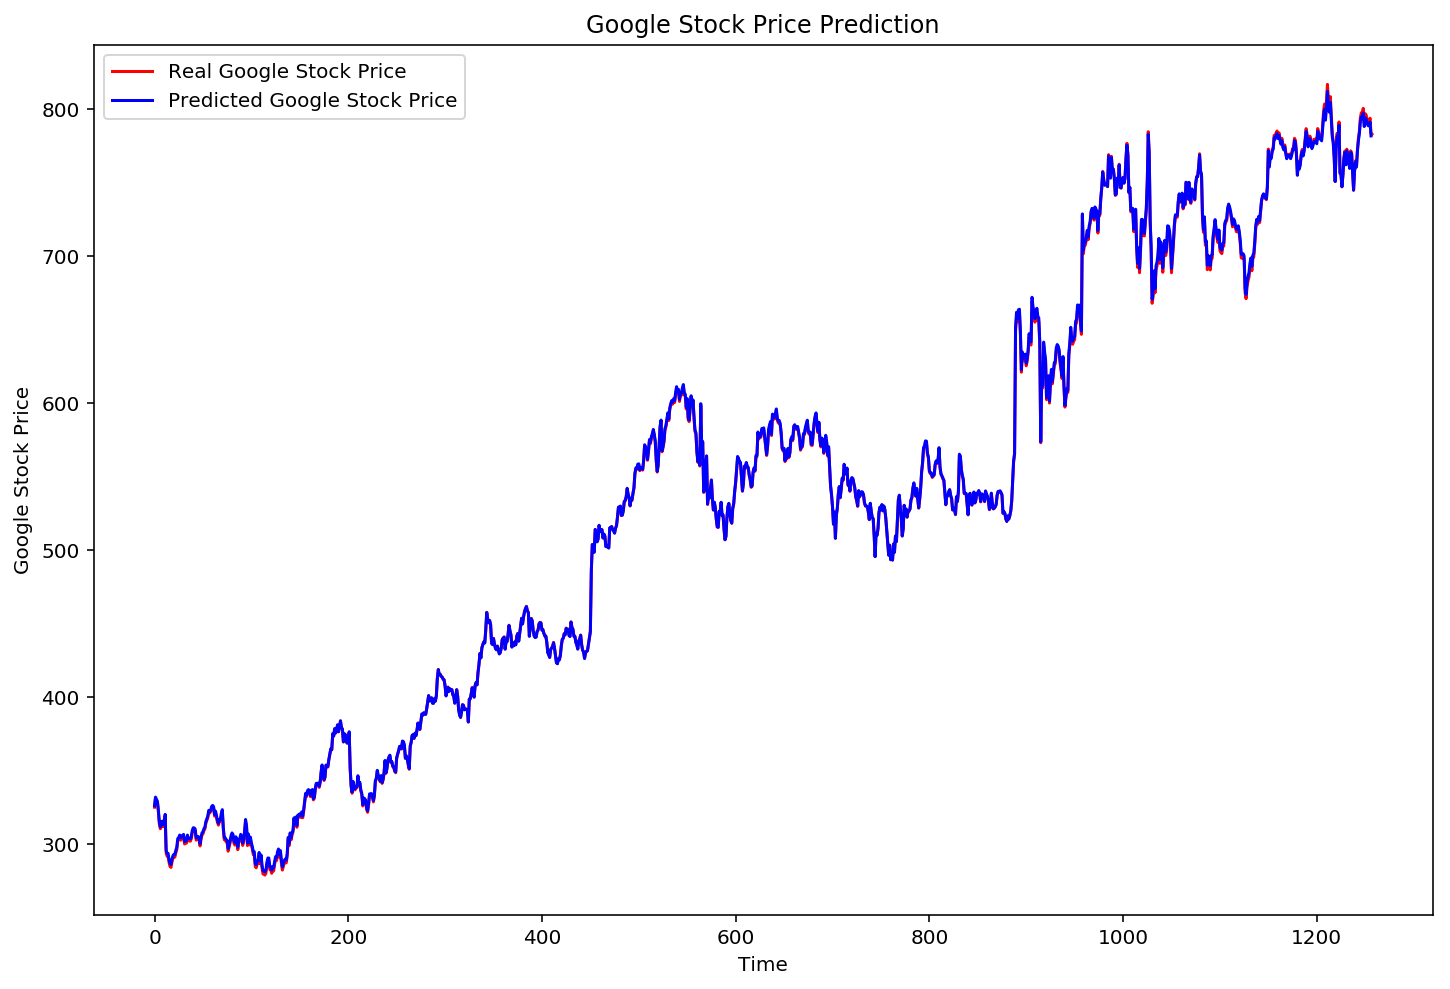

In [8]:
predicted_stock_price_train = rnn_regressor_model.predict(X_train)
predicted_stock_price_train = scaling.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price_train, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Holy cow look at that prediction man!
## Part 7 - Evaluating the Error in the model

In [9]:
# Part 6 - Evaluating the RNN
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock))
n = len(real_stock_price) # 800.0
overall_preformence = rmse / float(n)
print "Overall Preformace of RMSE: ", overall_preformence

Overall Preformace of RMSE:  0.207461576258


With and error like that the model is doing very well :D